In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Import the library for visualization
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.metrics import accuracy_score, f1_score

In [10]:
# Load the dataset from the given link
df = pd.read_csv('winequality-red.csv')

### Create a new column with binary values for wine quality

In [11]:
df["good_quality"] = df["quality"].apply(lambda x: 1 if x >= 7 else 0)

### Drop the original quality column


In [12]:
# Drop the column using drop
df.drop("quality", axis=1, inplace=True)

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Check for missing values

In [14]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
good_quality            0
dtype: int64


##### Create a correlation matrix

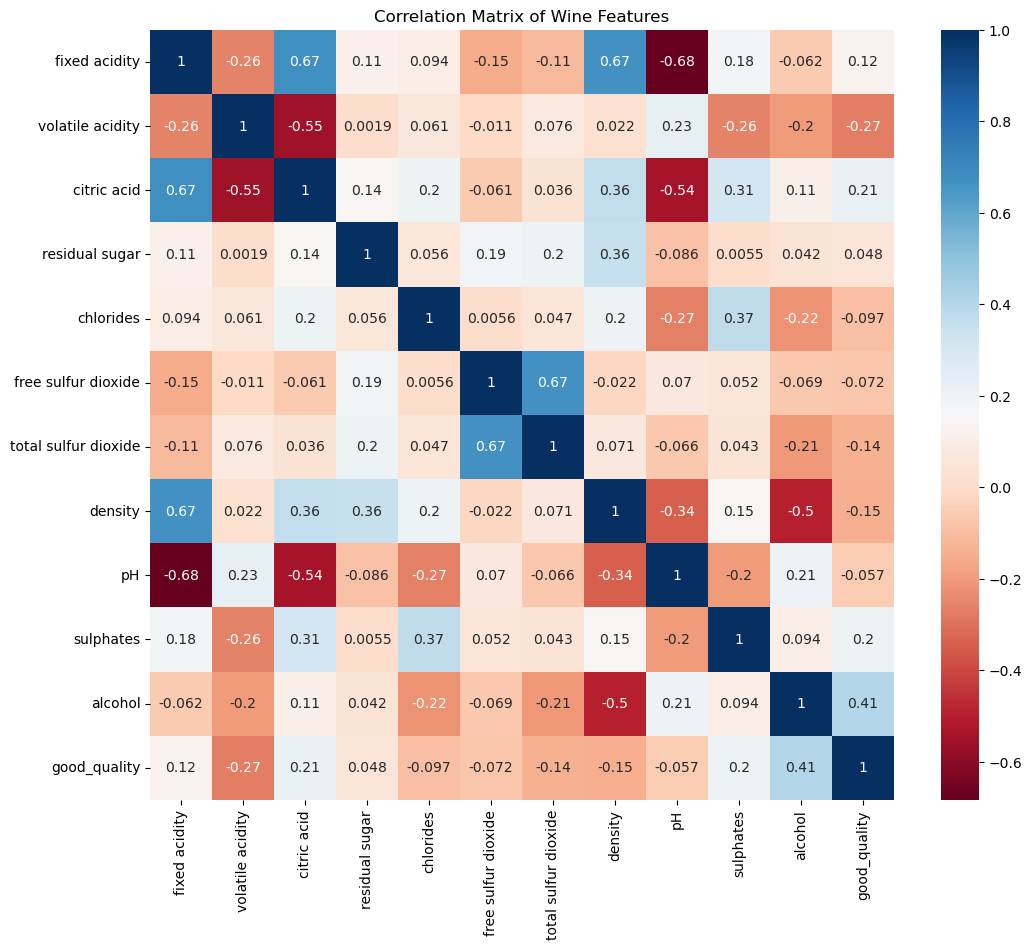

In [15]:
corr = df.corr()
plt.figure(figsize=(12,10))
#creating heatmap
sns.heatmap(corr, annot=True, cmap="RdBu")
plt.title("Correlation Matrix of Wine Features")
plt.show()

###### From the correlation matrix, we can see that some features are highly correlated with each other, such as fixed acidity and pH, or density and residual sugar. We can drop one of them to reduce multicollinearity.

In [16]:
# Dropping fixed acidity and density columns
df.drop(["fixed acidity", "density"], axis=1, inplace=True)

##### Dealing with outliers 

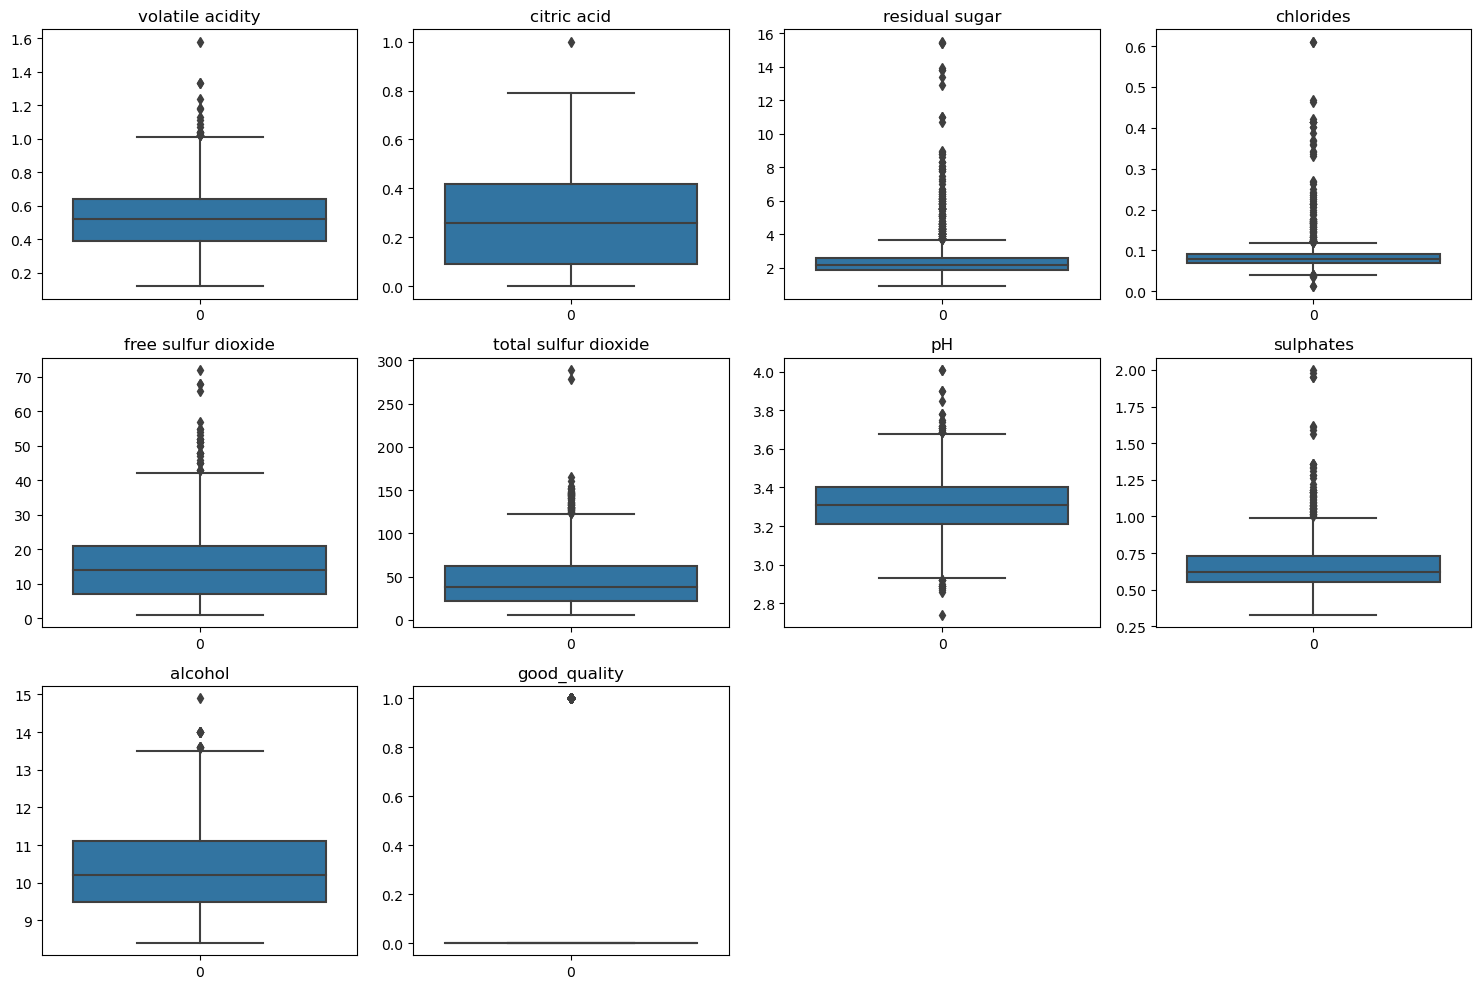

In [17]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### We can see that some features have many outliers, such as residual sugar, chlorides, sulphates, and alcohol. We can use the interquartile range (IQR) method to remove the outliers.

### Defining a function to remove outliers based on IQR


In [18]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] > lower) & (df[col] < upper)]
    return df

In [19]:
# Applying the function to the columns with outliers
cols = ["residual sugar", "chlorides", "sulphates", "alcohol"]
for col in cols:
    df = remove_outliers(df, col)

In [20]:
# Checking the shape of the dataframe after removing outliers
print(df.shape)

(1283, 10)


##### Normalizing data

In [21]:
# We can use the StandardScaler to normalize the data by subtracting the mean and dividing by the standard deviation
scaler = StandardScaler()

In [22]:
X = df.drop("good_quality", axis=1)

In [23]:
y = df["good_quality"]

In [24]:
X_scaled = scaler.fit_transform(X)

##### Split the data into features (X) and target (y)

In [25]:
# Split the data into training and test sets
# Use the train_test_split function with 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Decision Tree Classifier

In [26]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

#### Random Forest Classifier

In [27]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Evaluating the models

In [28]:
acc_dt = accuracy_score(y_test, y_pred_dt)

In [29]:
f1_dt = f1_score(y_test, y_pred_dt)

In [30]:
acc_rf = accuracy_score(y_test, y_pred_rf)

In [31]:
f1_rf = f1_score(y_test, y_pred_rf)

In [32]:
print("Accuracy and F1 scores of the models:")
print("Accuracy score of Decision Tree classifier= {:.2f}, F1 = {:.2f}".format(acc_dt, f1_dt))
print("Accuracy score of Random Forest classifier= {:.2f}, F1 = {:.2f}".format(acc_rf, f1_rf))


Accuracy and F1 scores of the models:
Accuracy score of Decision Tree classifier= 0.87, F1 = 0.44
Accuracy score of Random Forest classifier= 0.92, F1 = 0.57
